# Classification de documents : prise en main des outils

Le but de ce TP est de classer des documents textuels... Dans un premier temps, nous allons vérifier le bon fonctionnement des outils sur des données jouets puis appliquer les concepts sur des données réelles.


## Conception de la chaine de traitement
Pour rappel, une chaine de traitement de documents classique est composée des étapes suivantes:
1. Lecture des données et importation
    - Dans le cadre de nos TP, nous faisons l'hypothèse que le corpus tient en mémoire... Si ce n'est pas le cas, il faut alors ajouter des structures de données avec des buffers (*data-reader*), bien plus complexes à mettre en place.
    - Le plus grand piège concerne l'encodage des données. Dans le TP... Pas (ou peu) de problème. Dans la vraie vie: il faut faire attention à toujours maitriser les formats d'entrée et de sortie.
1. Traitement des données brutes paramétrique. Chaque traitement doit être activable ou desactivable + paramétrable si besoin.
    - Enlever les informations *inutiles* : chiffre, ponctuations, majuscules, etc... <BR>
    **L'utilité dépend de l'application!**
    - Segmenter en mots (=*Tokenization*)
    - Elimination des stop-words
    - Stemming/lemmatisation (racinisation)
    - Byte-pair encoding pour trouver les mots composés (e.g. Sorbonne Université, Ville de Paris, Premier Ministre, etc...)
1. Traitement des données numériques
    - Normalisation *term-frequency* / binarisation
    - Normalisation *inverse document frequency*
    - Elimination des mots rares, des mots trop fréquents
    - Construction de critère de séparabilité pour éliminer des mots etc...
1. Apprentissage d'un classifieur
    - Choix du type de classifieur
    - Réglage des paramètres du classifieur (régularisation, etc...)

## Exploitation de la chaine de traitement

On appelle cette étape la réalisation d'une campagne d'expériences: c'est le point clé que nous voulons traviller en TAL cette année.
1. Il est impossible de tester toutes les combinaisons par rapport aux propositions ci-dessus... Il faut donc en éliminer un certain nombre.
    - En discutant avec les experts métiers
    - En faisant des tests préliminaires
1. Après ce premier filtrage, il faut:
    - Choisir une évaluation fiable et pas trop lente (validation croisée, leave-one-out, split apprentissage/test simple)
    - Lancer des expériences en grand
        - = *grid-search*
        - parallèliser sur plusieurs machines
        - savoir lancer sur un serveur et se déconnecter
1. Collecter et analyser les résultats


## Inférence

L'inférence est ensuite très classique: la chaine de traitement optimale est apte à traiter de nouveaux documents

# Etape 1: charger les données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nltk

import codecs
import re
import os.path

In [2]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        #
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0:
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs


In [3]:
def load_movies(path2data): # 1 classe par répertoire
    alltxts = [] # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            txt = open(path2data+cl+'/'+f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt+=1 # chg répertoire = cht classe
        
    return alltxts,labs


In [8]:
path = "./movies1000/"

alltxts,alllabs = load_movies(path)

In [9]:
print(len(alltxts),len(alllabs))
print(alltxts[0])
print(alllabs[0])
print(alltxts[-1])
print(alllabs[-1])


2000 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , 

In [17]:
print(alllabs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Les données sont-elles équilibrées?


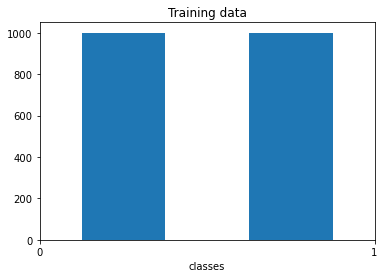

In [21]:
plt.hist(alllabs, bins=2, range=[0, 1],rwidth=0.5)
plt.xticks([0, 1])
plt.xlabel("classes")
plt.title("Training data")
plt.show()

In [23]:
random_sample= np.random.choice(alltxts,20)
print(random_sample)

['jamaica is a hot vacation spot . \nthe exchange rate encourages delusions of wealth ( approximately 30 jamaican dollars to one american ) , the sea is a brilliant blue , the air is warm but lacks humidity . \nand as tourism is unfortunately jamaica\'s biggest trade , foreigners enter and leave with a sense of relaxation . \nlife and debt takes a brassy look at life inside this impoverished country . \nwhile normal documentaries take the sally struthers approach of underlying scenes of starving children with tearful music , this film guides the viewer with a sarcastic voiceover that brings the troubles home without begging tears to the surface . \nthe voiceover is written by acclaimed author jamaica kincaid . \nit guides the audience along a tourist\'s journey and the story of the native inhabitants . \ninstead of telling you what you are already seeing on screen , it quips , " you don\'t see what happens after you flush the toilet . " \nthis engages a viewer to see and think about de

# Transformation paramétrique du texte

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import re
import unicodedata
import string


def preprocess_txt(doc):
    punc = string.punctuation  # recupération de la ponctuation
    punc += '\n\r\t'
    doc = doc.translate(str.maketrans(punc, ' ' * len(punc)))  
    doc = unicodedata.normalize('NFD', doc).encode('ascii', 'ignore').decode("utf-8")
    doc = re.sub('[0-9]+', '', doc)
    doc = doc.lower()
    return doc
    


In [25]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
print(stopwords)

{'so', 'who', 'd', 'into', 'ourselves', 'again', 'he', 'when', "wouldn't", 'y', 'ain', 'same', 'up', 'most', 'before', 'through', 'there', 'each', 'if', 'why', 'both', 'other', 'very', 'o', 'on', 'over', 've', 'with', 'needn', "you're", "it's", 'been', 'from', 'wouldn', 'theirs', 'will', 'herself', 'their', 'haven', "didn't", "mightn't", "that'll", "don't", 'his', 'wasn', "needn't", 'we', 'its', 'your', 'itself', 'shan', "isn't", "mustn't", 'any', 'was', 'has', 'but', 'should', 'yourself', 'once', 'in', 'then', 'were', "she's", 'be', 'now', 'until', 'or', 'this', 'below', 'm', 'hers', 'didn', 'our', "haven't", 'to', 'mustn', 'while', 'doesn', 'that', "should've", 'she', 'them', "you've", 'those', 'themselves', 'doing', 'own', 'such', 'll', 'you', 'too', 's', "aren't", 'these', 'under', 'few', 'hasn', 'are', 'whom', "shouldn't", 't', 'further', 'mightn', "won't", 'nor', 'yours', 'weren', 'down', 'against', 'not', 'than', 'her', 'my', "weren't", 'which', 'here', 'for', 'myself', 'hadn', 

In [55]:
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import time


stemmer = EnglishStemmer()


class StemmedTfidfVectorizer(TfidfVectorizer):
    """
        A custom class to pass a stemmer to CountVectorizer
    """
    # TODO : 
    # fix attributes
    def __init__(self, stemmer, preprocessor=None, stop_words=None, max_features=None, min_df=None, max_df=None, ngram_range=(1,1)):
        super(StemmedTfidfVectorizer, self).__init__(
            preprocessor=preprocessor,
            stop_words=stop_words,
            max_features=max_features,
            min_df=min_df, 
            max_df=max_df, 
            ngram_range=ngram_range
        )
        self.stemmer = stemmer

    def fit_transform(self, raw_documents, y=None): 
        """
            basic fit transform but with time execution
            TODO : write seperatly
        """
        start = time.time()
        res = super().fit_transform(raw_documents, y)
        end = time.time()
        print(f"Fit tranform on {self.__class__.__name__} with data of length {len(raw_documents)} exec in {end - start} secs")
        return res
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc:(self.stemmer.stem(w) for w in analyzer(doc))
    
    def report(self):
        """
            A simple report regarding the name of the features and the different 
            parameters
        """
        params = super().get_params()
        del params["stop_words"]
        del params["preprocessor"]
        del params["stemmer"]
        
        print(f"Found vocab of length {params['max_features']} with the following params \n {params}")
        
    def get_attribute(self, attr): 
        return params[attr]


# Première experience

In [56]:
vectorizer = StemmedTfidfVectorizer(
    preprocessor=preprocess_txt, 
    stop_words=[], 
    stemmer=stemmer,
    max_features=5000, 
    min_df=0, 
    max_df=1.0, 
    ngram_range=(1,1)
)

In [57]:
X=vectorizer.fit_transform(alltxts)


Fit tranform on StemmedTfidfVectorizer with data of length 2000 exec in 19.826777458190918 secs


In [86]:
from scipy.sparse import coo_matrix

X = coo_matrix(X)
y=alllabs

## Premiers tests  : evaluation naive des classifieurs

In [110]:
import sklearn.naive_bayes as nb
from sklearn import svm
from sklearn import linear_model as lin
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

clfs = {
    "logreg" : lin.LogisticRegression,
    "svm" : svm.LinearSVC, 
    "nb" : nb.MultinomialNB,
    "perceptron" : lin.Perceptron
}


In [67]:
for clf in clfs.values():
    print(f'pour le classieur {clf.__name__}',cross_val_score(clf(), X, y, cv=5).mean())

pour le classieur LogisticRegression 0.8314999999999999
pour le classieur LinearSVC 0.8554999999999999
pour le classieur MultinomialNB 0.8109999999999999
pour le classieur Perceptron 0.8400000000000001


## Premier modèle : SVM

In [116]:
from sklearn.model_selection import StratifiedKFold

clf= clfs['svm']()

def optimize_vectorizer(clf, X,y,max_features,min_df,max_df,ngram_range,stop_word=[]):
    for mf in max_features:
        for mi in min_df:
            for ma in max_df:
                for r in ngram_range :
                    skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True) 
                    L_score=[]
                    X=np.array(X)
                    y=np.array(y)
                    for train_index, test_index in skf.split(X, y):
                        X_train, X_test = X[train_index], X[test_index]    
                        y_train, y_test = y[train_index], y[test_index]                   
                        X_train =vectorizer.fit_transform(X_train)
                        X_test = vectorizer.transform(X_test)
                        print(X_test)
                        X_train = coo_matrix(X_train)
                        clf.fit(X_train,y_train)
                        y_pred=clf.predict(X_test)
                        L_score.append(accuracy_score(y_test, y_pred))
                        
                    print(np.mean(L_score))



In [117]:
optimize_vectorizer(clf, alltxts,y,[1000],[1,2],[0.5,0.65,0.8 ],[(1,1),(1,2)],stop_word=stopwords)

max_features :1000 min_df :1  max_df :0.5  ngram_rande :(1, 1)

Fit tranform on StemmedTfidfVectorizer with data of length 1600 exec in 17.128896236419678 secs
  (0, 4989)	0.04312350553675848
  (0, 4985)	0.0502025614355847
  (0, 4947)	0.03235020492751584
  (0, 4931)	0.06519918887222094
  (0, 4929)	0.01985757805580406
  (0, 4911)	0.05939297402401372
  (0, 4888)	0.08658019703785538
  (0, 4883)	0.025248417641714677
  (0, 4879)	0.026121253255561968
  (0, 4867)	0.030955092745095794
  (0, 4846)	0.09253527703666072
  (0, 4836)	0.059011119610401716
  (0, 4832)	0.024650571972052567
  (0, 4786)	0.1080966442991914
  (0, 4756)	0.033298143346980495
  (0, 4625)	0.038402214567941406
  (0, 4544)	0.06924323359329719
  (0, 4528)	0.038638369438387485
  (0, 4519)	0.025865393450293886
  (0, 4504)	0.058636680316184346
  (0, 4486)	0.04064450314117953
  (0, 4480)	0.033298143346980495
  (0, 4475)	0.04994285651144591
  (0, 4474)	0.036546647717193695
  (0, 4469)	0.024714317543321707
  :	:
  (399, 411)	0.01833663

Fit tranform on StemmedTfidfVectorizer with data of length 1600 exec in 15.851652145385742 secs
  (0, 4980)	0.024459997678970807
  (0, 4979)	0.04162261254925075
  (0, 4976)	0.025616424001736783
  (0, 4967)	0.020700602328999645
  (0, 4957)	0.011885621580253325
  (0, 4945)	0.012742465519331092
  (0, 4935)	0.0496381677123206
  (0, 4930)	0.01715936690981494
  (0, 4929)	0.10176594934880705
  (0, 4927)	0.023357694153278163
  (0, 4909)	0.035566507582792416
  (0, 4907)	0.023172806137812405
  (0, 4900)	0.01974818902287859
  (0, 4894)	0.0198908442398829
  (0, 4893)	0.008580118296907364
  (0, 4887)	0.021509560409655747
  (0, 4877)	0.010280608388810532
  (0, 4865)	0.012157732515620157
  (0, 4849)	0.03200186903665089
  (0, 4845)	0.024109086915219173
  (0, 4841)	0.012192443234184072
  (0, 4830)	0.019579725865715193
  (0, 4816)	0.037258890481226735
  (0, 4806)	0.02359109291582089
  (0, 4769)	0.022333135281680145
  :	:
  (399, 395)	0.02162445995823098
  (399, 372)	0.02567378885663532
  (399, 368)	0.02

Fit tranform on StemmedTfidfVectorizer with data of length 1600 exec in 17.773582220077515 secs
  (0, 4989)	0.04371055805969959
  (0, 4985)	0.05046079207246091
  (0, 4948)	0.0322851088702933
  (0, 4933)	0.06417866316955936
  (0, 4931)	0.019743461119015177
  (0, 4913)	0.059662246952839657
  (0, 4889)	0.08725005614111872
  (0, 4884)	0.02539515916493689
  (0, 4880)	0.026484424084673733
  (0, 4868)	0.030565327849955522
  (0, 4849)	0.09215237049285172
  (0, 4839)	0.059859625256217325
  (0, 4835)	0.025002072152546302
  (0, 4791)	0.10457200553094756
  (0, 4760)	0.033456220933633485
  (0, 4628)	0.03885041246229389
  (0, 4547)	0.06847288584299771
  (0, 4530)	0.0385606201470435
  (0, 4522)	0.025966146372759073
  (0, 4506)	0.05743929201629088
  (0, 4489)	0.04063890664330243
  (0, 4483)	0.03330587473237743
  (0, 4479)	0.049842359990554905
  (0, 4478)	0.03592199201675941
  (0, 4472)	0.025099593725495133
  :	:
  (399, 414)	0.017278045639780654
  (399, 409)	0.09148193125989444
  (399, 407)	0.03571921

KeyboardInterrupt: 

## Equilibrage des données

Un problème reconnu comme dur dans la communauté est celui de l'équilibrage des classes (*balance* en anglais). Que faire si les données sont à 80, 90 ou 99% dans une des classes?
Le problème est dur mais fréquent; les solutions sont multiples mais on peut isoler 3 grandes familles de solution.

1. Ré-équilibrer le jeu de données: supprimer des données dans la classe majoritaire et/ou sur-échantilloner la classe minoritaire.<BR>
   $\Rightarrow$ A vous de jouer pour cette technique
1. Changer la formulation de la fonction de coût pour pénaliser plus les erreurs dans la classe minoritaire:
soit une fonction $\Delta$ mesurant les écarts entre $f(x_i)$ et $y_i$ 
$$C = \sum_i  \alpha_i \Delta(f(x_i),y_i), \qquad \alpha_i = \left\{
\begin{array}{ll}
1 & \mbox{si } y_i \in \mbox{classe majoritaire}\\
B>1 & \mbox{si } y_i \in \mbox{classe minoritaire}\\
\end{array} \right.$$
<BR>
   $\Rightarrow$ Les SVM et d'autres approches sklearn possèdent des arguments pour régler $B$ ou $1/B$... Ces arguments sont utiles mais pas toujours suffisant.
1. Courbe ROC et modification du biais. Une fois la fonction $\hat y = f(x)$ apprise, il est possible de la *bidouiller* a posteriori: si toutes les prédictions $\hat y$ sont dans une classe, on va introduire $b$ dans $\hat y = f(x) + b$ et le faire varier jusqu'à ce qu'un des points change de classe. On peut ensuite aller de plus en plus loin.
Le calcul de l'ensemble des scores associés à cette approche mène directement à la courbe ROC.

**Note:** certains classifieurs sont intrinsèquement plus résistante au problème d'équilibrage, c'est par exemple le cas des techniques de gradient boosting que vous verrez l'an prochain.